In [1]:
# Vamos ahora a tomar de nuevo el conjunto de datos con el que estuvimos trabajando en los últimos días y vamos a continuar con el análisis de las estadísitcas de los contenidos del conjunto de datos.
# Para todas los ejercicios de pair programming de Estadística I, II y III usaremos el dataframe que se tome para el desarrollo de este ejercicio de pair programming.
# Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

In [2]:

from scipy import stats 
import seaborn as sns
import numpy as np 
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt
from scipy.stats import skew

df= pd.read_csv('./datos/India_Menu.csv')

In [3]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [4]:
# Los objetivos de hoy son:



# Intervalo de confianza de algunas de las variables numéricas del dataset


In [5]:
df.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

In [6]:
df['Total Sugars (g)'].describe()

count    141.000000
mean      15.464894
std       15.690202
min        0.000000
25%        2.330000
50%        9.160000
75%       26.950000
max       64.220000
Name: Total Sugars (g), dtype: float64

In [7]:
df["Added Sugars (g)"].describe()

count    141.000000
mean      10.336950
std       14.283388
min        0.000000
25%        0.000000
50%        3.640000
75%       19.230000
max       64.220000
Name: Added Sugars (g), dtype: float64

In [8]:
#df["Trans fat (g)"].fillna(value=0, inplace=True)

In [9]:
# Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
# Tabla de contingencia

bins_total = np.arange(0, 65, 5) #mínimo, maximo, y separación (en este caso separación de 10 en 10)
bins_added = np.arange(0, 65, 5)

df["total_sugars_group"] = pd.cut(df["Total Sugars (g)"], bins=bins_total)
df["added_sugars_group"] = pd.cut(df["Added Sugars (g)"], bins=bins_added)


df_data_crosstab = pd.crosstab(df["total_sugars_group"], 
                            df["added_sugars_group"]) 


In [10]:

df["trans_fat_group"].unique()

KeyError: 'trans_fat_group'

In [ ]:
df_data_crosstab

added_sugars_group,"(0, 5]","(5, 10]","(10, 15]","(15, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 45]","(45, 50]","(50, 55]","(55, 60]"
total_sugars_group,,,,,,,,,,,,
"(0, 5]",17,0,0,0,0,0,0,0,0,0,0,0
"(5, 10]",14,4,0,0,0,0,0,0,0,0,0,0
"(10, 15]",0,3,1,0,0,0,0,0,0,0,0,0
"(15, 20]",0,3,5,0,0,0,0,0,0,0,0,0
"(20, 25]",0,1,2,2,3,0,0,0,0,0,0,0
"(25, 30]",1,0,2,4,3,5,0,0,0,0,0,0
"(30, 35]",1,0,0,1,0,1,2,0,0,0,0,0
"(35, 40]",0,0,0,0,1,4,0,1,0,0,0,0
"(40, 45]",0,0,0,0,0,0,1,0,2,0,0,0


In [ ]:
# Coeficiente de correlación de las variables numéricas del dataset.

matriz_correlacion = np.corrcoef(df["Total Sugars (g)"], df["Added Sugars (g)"])
print(matriz_correlacion) 

[[1.         0.91216781]
 [0.91216781 1.        ]]


In [ ]:
#no existe relación lineal entre las variables grasas saturadas y grasas trans

In [ ]:
# Sesgos de alguna de las variables numéricas del dataset.

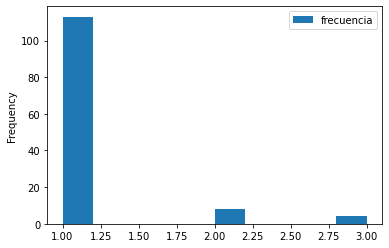

In [ ]:
df_total_sugar = df.groupby("Total Sugars (g)")
df_total_sugar_conteo =  df_total_sugar.agg(frecuencia=("Total Sugars (g)", "count"))

df_total_sugar_conteo.plot.hist(); 

In [ ]:
skewness = skew(df["Trans fat (g)"])
print(skewness)

In [ ]:
# Interpretación de los resultados.
# Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.